In [1]:
import requests


url = 'https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt'
response = requests.get(url)


shakespeare_data = response.text

print(shakespeare_data[:500])


First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor


In [2]:
print("Lenghth of the data:",len(shakespeare_data))

Lenghth of the data: 1115394


In [3]:
chars =sorted(list(set(shakespeare_data)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


**In the below output each character is mapped with each integer**

In [4]:
stoi ={ch:i for i,ch in enumerate(chars)}
itos ={i:ch for i,ch in enumerate(chars)}
encode = lambda s:[stoi[c] for c in s] #encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string
print(encode("Happy learning "))
print(decode(encode("Happy learning")))

[20, 39, 54, 54, 63, 1, 50, 43, 39, 56, 52, 47, 52, 45, 1]
Happy learning


**Enocding the entire data**

In [5]:
import torch
data = torch.tensor(encode(shakespeare_data), dtype=torch.long)
print(data.shape,data.dtype)
print(data[:1000])

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

Splitting the data into the train and test split.

90% for trainig data and 10% for testing data

In [6]:
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

In [7]:
block_size = 8
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [8]:
x =train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
  context = x[:t+1]
  target = y[t]
  print(f"when input is{context} the target: {target}")

when input istensor([18]) the target: 47
when input istensor([18, 47]) the target: 56
when input istensor([18, 47, 56]) the target: 57
when input istensor([18, 47, 56, 57]) the target: 58
when input istensor([18, 47, 56, 57, 58]) the target: 1
when input istensor([18, 47, 56, 57, 58,  1]) the target: 15
when input istensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input istensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [9]:
torch.manual_seed(1337)
batch_size = 4
block_size = 8

def get_batch(split):
  data = train_data if split == 'train' else val_data
  ix = torch.randint(len(data) - block_size, (batch_size,))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  return x,y


xb,yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size):
  for t in range(block_size):
    context = xb[b,:t+1]
    target = yb[b,t]
    print(f"when input is{context.tolist()} the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is[24] the target: 43
when input is[24, 43] the target: 58
when input is[24, 43, 58] the target: 5
when input is[24, 43, 58, 5] the target: 57
when input is[24, 43, 58, 5, 57] the target: 1
when input is[24, 43, 58, 5, 57, 1] the target: 46
when input is[24, 43, 58, 5, 57, 1, 46] the target: 43
when input is[24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is[44] the target: 53
when input is[44, 53] the target: 56
when input is[44, 53, 56] the target: 1
when input is[44, 53, 56, 1] the target: 58
when input is[44, 53, 56, 1, 58] the target: 46
when input is[44, 53, 56, 1, 58, 4

In [14]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # Each token directly reads off the logits for the next token from a lookup
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):
        logits = self.token_embedding_table(idx)  # (B, T, C)(Batch Size,sequence length,vocabulary size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            # Flatten targets and logits for cross-entropy loss computation
            logits = logits.view(B * T, C)
            targets = targets.view(B * T)
            # Compute the loss
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            logits, _ = self(idx)
            logits = logits[:, -1, :]  # Focus on the last time step
            probs = F.softmax(logits, dim=-1)  # Convert logits to probabilities
            idx_next = torch.multinomial(probs, num_samples=1)  # Sample from the distribution
            idx = torch.cat((idx, idx_next), dim=1)  # Append the sampled token to the sequence
        return idx




m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)  # Should be (B*T, C)
print(loss)  # Cross-entropy loss if targets are provided


idx = torch.zeros((1,1),dtype=torch.long)
print(decode(m.generate(idx= torch.zeros((1,1),dtype =torch.long),max_new_tokens=100)[0].tolist()))


torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)

Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


Using the Adam optimizer

In [16]:
optimizer = torch.optim.AdamW(m.parameters(),lr=1e-3)

In [17]:
batch_size = 32
for steps in range(10000):

  #sample a batch of data

  xb,yb = get_batch('train')

  #evaluate the loss
  logits,loss = m(xb,yb)
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()

print(loss.item())

2.4183878898620605


In [19]:

print(decode(m.generate(idx= torch.zeros((1,1),dtype =torch.long),max_new_tokens=500)[0].tolist()))



Wher vouprrouthercc.
hathe; d!
My hind tt hinig t ouchos tes; st yo hind wotte grotonear 'so it t jod weancotha:
h hay.JUCle n prids, r loncave w hollular s O:
HIs; ht anjx?

DUThinqunt.

LaZAnde.
athave l.
KEONH:
ARThanco be y,-hedarwnoddy scace, tridesar, wnl'shenous s ls, theresseys
PlorseelapinghiybHen yof GLUCEN t l-t E:
I hisgothers je are!-e!
QLYotouciullle'z,
Thitertho s?
NDan'spererfo cist ripl chys er orlese;
Yo jehof h hecere ek? wferommot mowo soaf yoit, ince his, t, f at. fal whetri


In [20]:
#self attention

torch.manual_seed(1337)
B,T,C = 4,8,2
x = torch.randn(B,T,C)
x.shape


torch.Size([4, 8, 2])

**Scaled Dot product Attention**

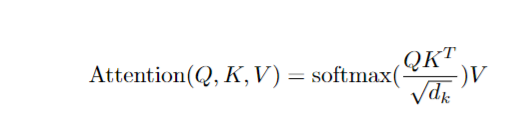

In [27]:
head_size = 16
key=nn.Linear(C,head_size,bias=False)
query = nn.Linear(C,head_size,bias=False)
value = nn.Linear(C,head_size,bias=False)
k = key(x) #(B,T,16)
q = query(x) #(B,T,16)
wei = q @ k.transpose(-2,-1) #(B,T,16) @ (B,16,T) ---> (B,T,T)

In [31]:
tril = torch.tril(torch.ones(T,T))
#wei = torch.zeros((T,T))
wei = wei.masked_fill(tril==0,float('-inf'))
wei =F.softmax(wei,dim=-1)
#out =wei @ x
v= value(x)
out = wei @ v
out.shape

torch.Size([4, 8, 16])

In [32]:
tril

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [33]:
wei

tensor([[[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.6377, 0.3623, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.3188, 0.3588, 0.3224, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.2385, 0.2772, 0.2406, 0.2437, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.1824, 0.3194, 0.1700, 0.1655, 0.1628, 0.0000, 0.0000, 0.0000],
         [0.1522, 0.1419, 0.1553, 0.1571, 0.2492, 0.1442, 0.0000, 0.0000],
         [0.1429, 0.1397, 0.1465, 0.1498, 0.1433, 0.1344, 0.1434, 0.0000],
         [0.1096, 0.1171, 0.1081, 0.1077, 0.1084, 0.2139, 0.1094, 0.1256]],

        [[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.4807, 0.5193, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.2188, 0.2354, 0.5459, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.3083, 0.2116, 0.2582, 0.2219, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.2042, 0.1739, 0.1588, 0.3035, 0.1597, 0.0000, 0.0000, 0.0000],
         [0.1542, 0.200

In [34]:
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
wei = q @ k.transpose(-2,-1) * head_size**-0.5


In [35]:
k.var()

tensor(1.1137)

In [36]:
q.var()

tensor(1.0013)

In [37]:
wei.var()

tensor(1.0981)

**softmax equlization**

In [39]:
torch.softmax(torch.tensor([0.1,-0.2,0.3,-0.2,-0.5]),dim =-1)

tensor([0.2352, 0.1742, 0.2873, 0.1742, 0.1291])

In [41]:
torch.softmax(torch.tensor([0.1,-0.2,-0.3,0.2,0.5])*8,dim =-1)

tensor([0.0359, 0.0033, 0.0015, 0.0798, 0.8796])